# Hypothesis testing

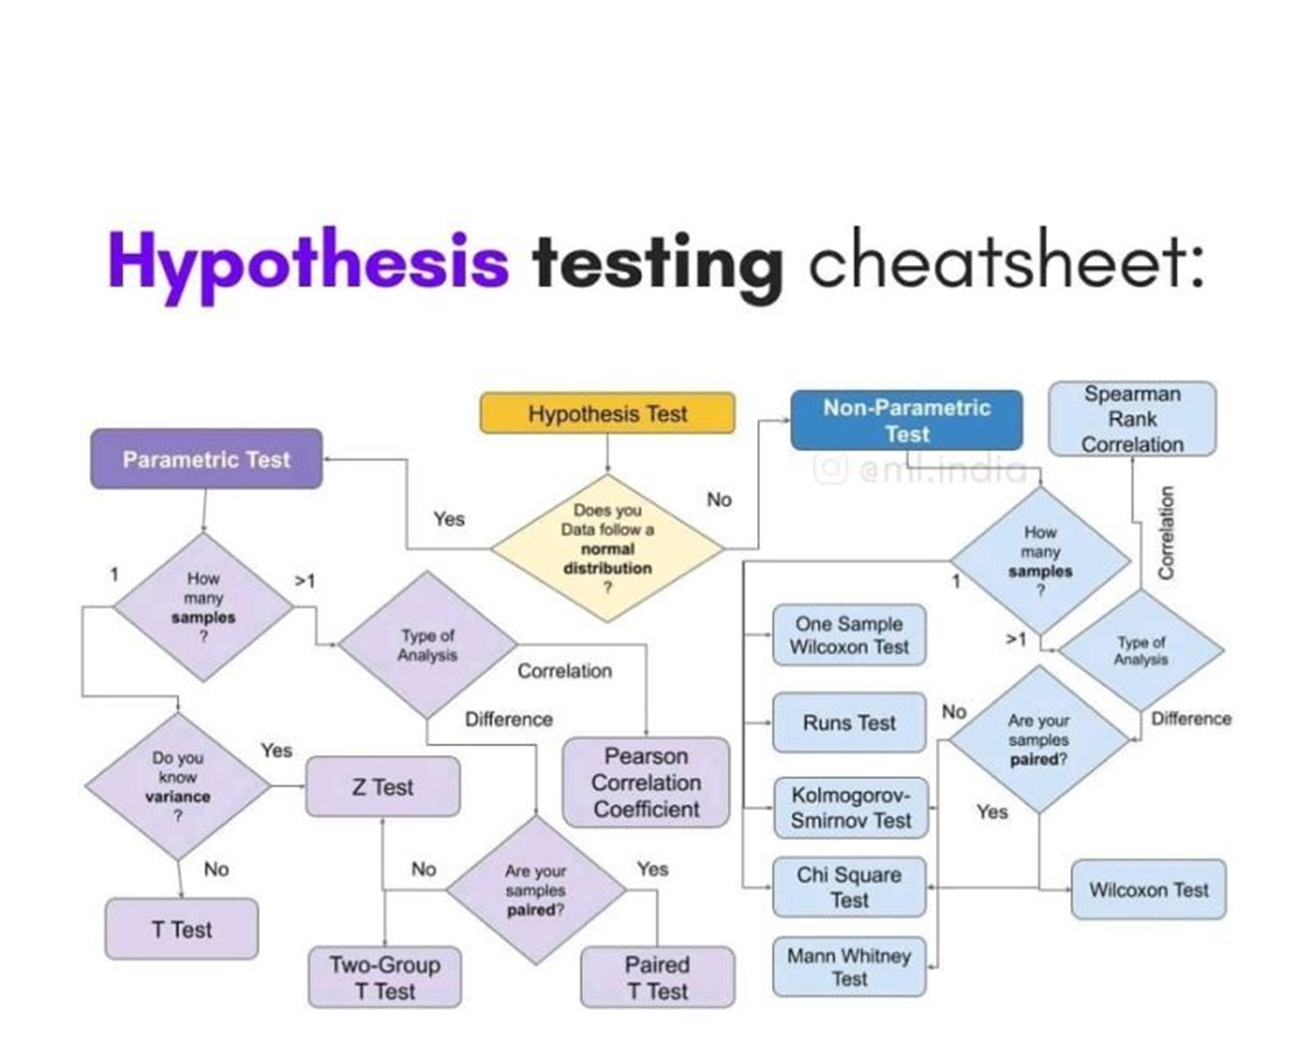

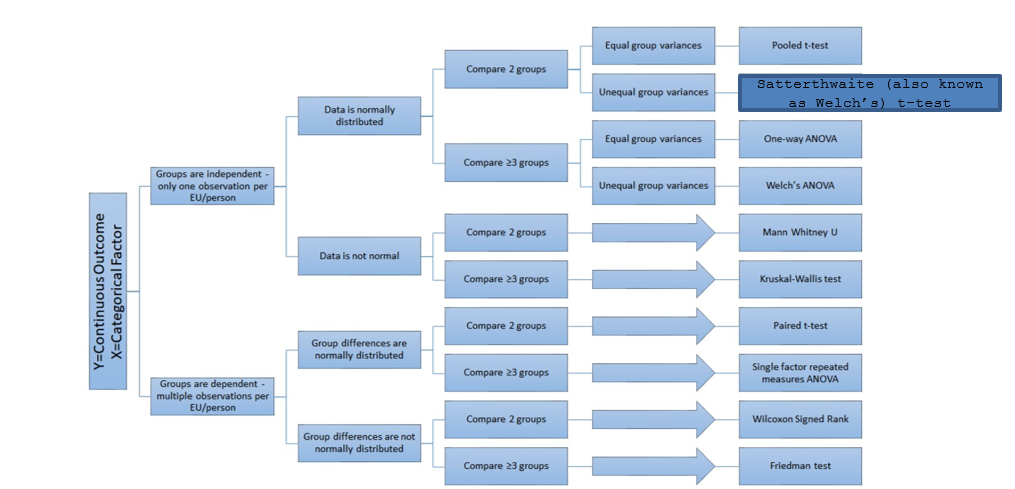

# Changing directory

In [243]:
import os
os.chdir(r'E:\Data science course\Data mining course\Day 7. data mining class')
os.getcwd()

'E:\\Data science course\\Data mining course\\Day 7. data mining class'

# One Sample T-Test


In [244]:
#creating random data set of different weights for individuals
average_weight = [33,34,35,36,32,28,29,30,31,37,36,35,33,34,31,40,24]

In [245]:
from scipy import stats #importing stats package

In [246]:
stats.ttest_1samp(average_weight,35)

Ttest_1sampResult(statistic=-2.354253623010381, pvalue=0.03166804359862131)

# Two-Sample T-test

In [247]:
import pandas as pd

In [248]:
df = pd.read_csv("Data for t-test practice.csv")

In [249]:
#check shape
df.shape

(14, 2)

In [250]:
df

,grouping,height
0,men,181.5
1,men,187.3
2,men,175.3
3,men,178.3
4,men,169.0
5,men,183.2
6,men,184.5
7,women,175.4
8,women,172.1
9,women,181.1


### Subsetting the Data

In [251]:
# Subset data
male = df.query('grouping == "men"')['height']
female = df.query('grouping == "women"')['height']

In [252]:
#or
male= df[df['grouping'] == "men"]['height']
female = df[df['grouping']== "women"]['height']

### Descriptive Statistics

In [253]:
df.groupby('grouping').describe()

height                                                           
          count        mean       std    min     25%    50%     75%    max
grouping                                                                  
men         7.0  179.871429  6.216836  169.0  176.80  181.5  183.85  187.3
women       7.0  171.057143  5.697619  165.2  166.65  170.3  173.75  181.1

## Check the Assumptions of the Two-Sample T-test

# Indepency

# Cheking Outliers

# Visualize the Data

In [254]:
import seaborn as sns

<AxesSubplot:xlabel='grouping', ylabel='height'>

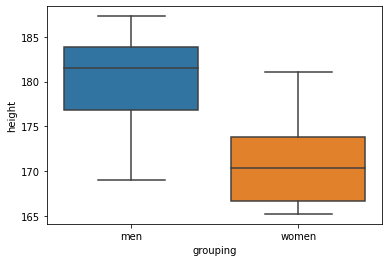

In [255]:
sns.boxplot(x='grouping', y='height', data=df)

<AxesSubplot:xlabel='grouping', ylabel='height'>

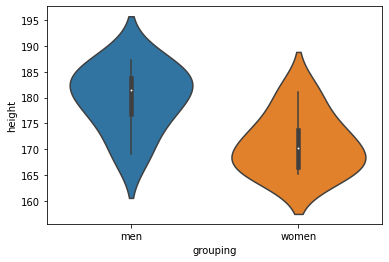

In [256]:
sns.violinplot(x='grouping', y='height', data=df)

### Checking the Normality of Data

In [257]:
import scipy.stats as stats

In [258]:
stats.shapiro(male)

ShapiroResult(statistic=0.9550848603248596, pvalue=0.7756242156028748)

In [259]:
stats.shapiro(female)

ShapiroResult(statistic=0.9197608828544617, pvalue=0.467536598443985)

## GRAPHICAL METHODS

In [260]:
import matplotlib.pyplot as plt

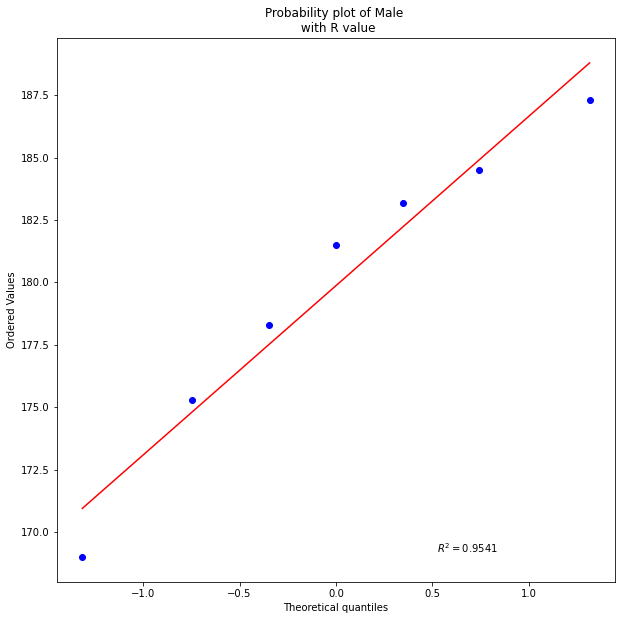

In [261]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
"""
These are subplot grid parameters encoded as a single integer. For example, "111" means "1x1 grid, first subplot" and 
"234" means "2x3 grid, 4th subplot".

Alternative form for add_subplot(111) is add_subplot(1, 1, 1).
"""

normality_plot, stat = stats.probplot(male, plot= plt, rvalue= True)
ax.set_title("Probability plot of Male \n with R value")
ax.set

plt.show()

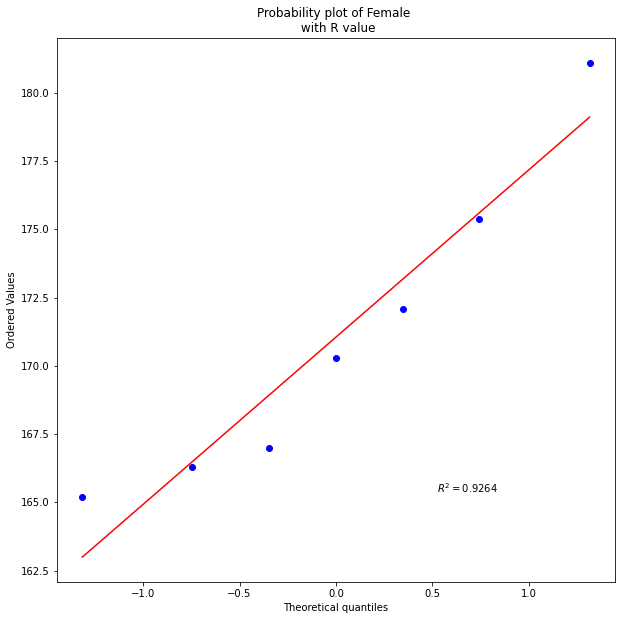

In [262]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(female, plot= plt, rvalue= True)
ax.set_title("Probability plot of Female \n with R value")
ax.set

plt.show()

### Checking the Homogeneity of Variances Assumption

In [263]:
stats.levene(male, female)

LeveneResult(statistic=0.026695150465104206, pvalue=0.8729335280501348)

## Two-Sample T-test with Python: 4 Different Methods

#### After cheking all assumption

## 1)Independent Two-Sample T-test with SciPy

In [264]:
stats.ttest_ind(male, female, equal_var=True)

Ttest_indResult(statistic=2.765444762721087, pvalue=0.01710570152816618)

In [265]:
#0r
res = stats.ttest_ind(male, female, 
                      equal_var=True)

display(res)

Ttest_indResult(statistic=2.765444762721087, pvalue=0.01710570152816618)

## 2)Independent Two-Sample T-test with Pingouin

In [266]:
!pip install pingouin

In [267]:
import pingouin as pg

In [268]:
res = pg.ttest(male, female, correction=False)
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.765445,12,two-sided,0.017106,"[1.87, 15.76]",1.478192,3.601,0.718909


### 3)Independent Two-Sample T-test with Statsmodels

In [269]:
from statsmodels.stats.weightstats import ttest_ind

ttest_ind(male, female)

(2.7654447627210694, 0.017105701528166727, 12.0)

## Interpreting the Effect Size (Cohen’s D)

https://rpsychologist.com/cohend/

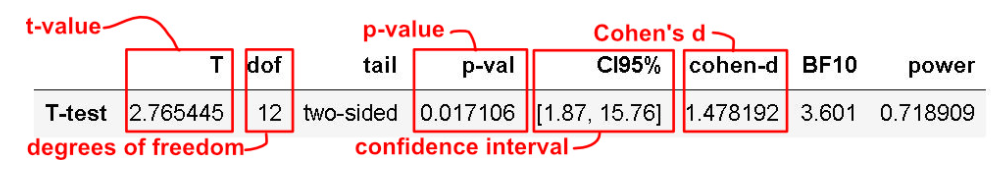

## How to Interpret the Results from a T-test

## 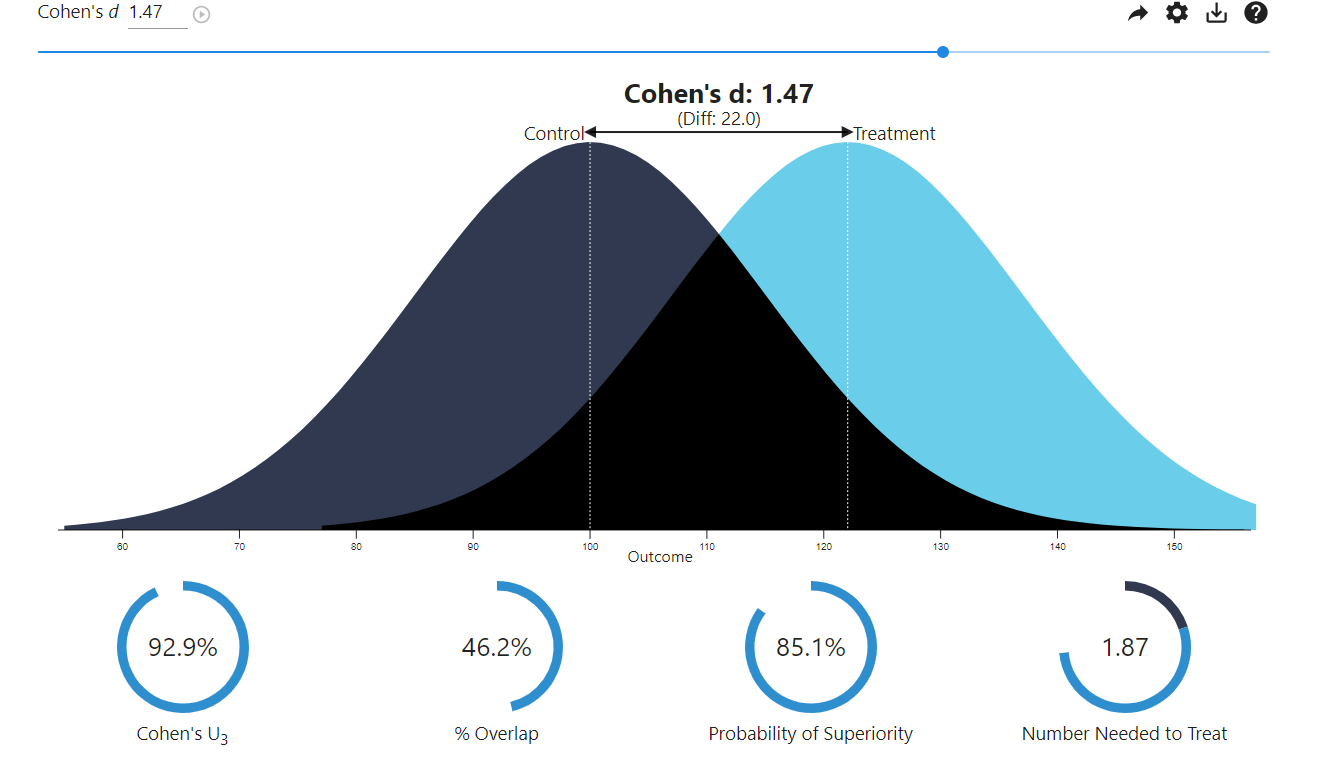

https://rpsychologist.com/cohend/

https://pingouin-stats.org/generated/pingouin.bayesfactor_ttest.html

## 4)Independent Two-Sample T-test with researchpy

In [270]:
import researchpy as rp

https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

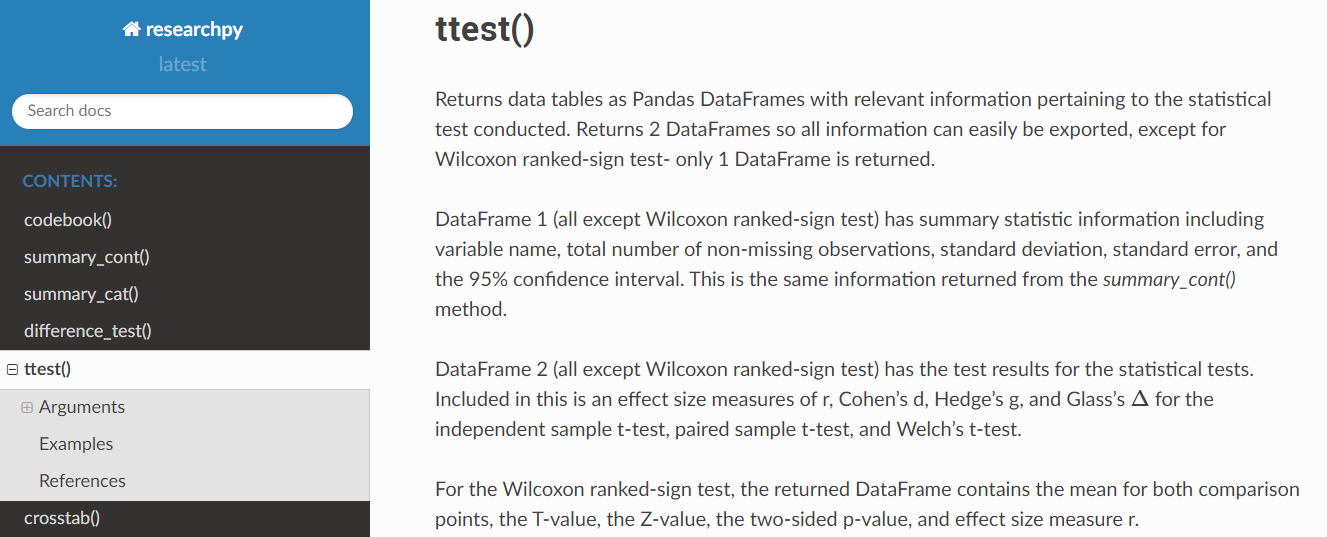

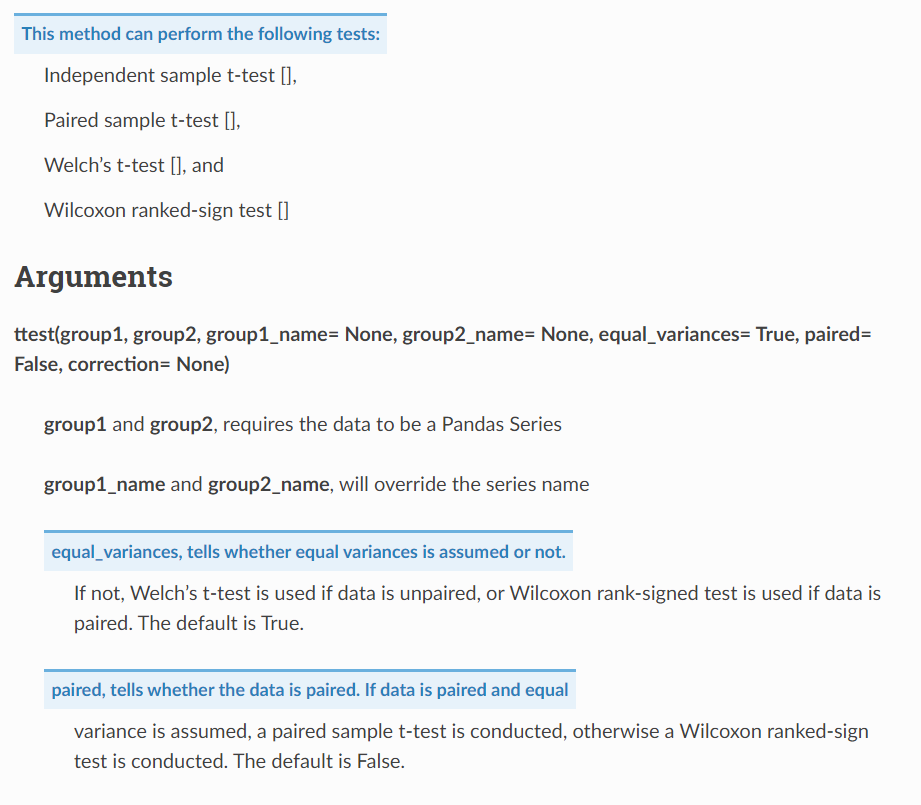

### Independent t-test using researchpy

### Paired samples t-test using researchpy

### Welch's t-test using researchpy

### Wilcoxon signed-rank test  using researchpy

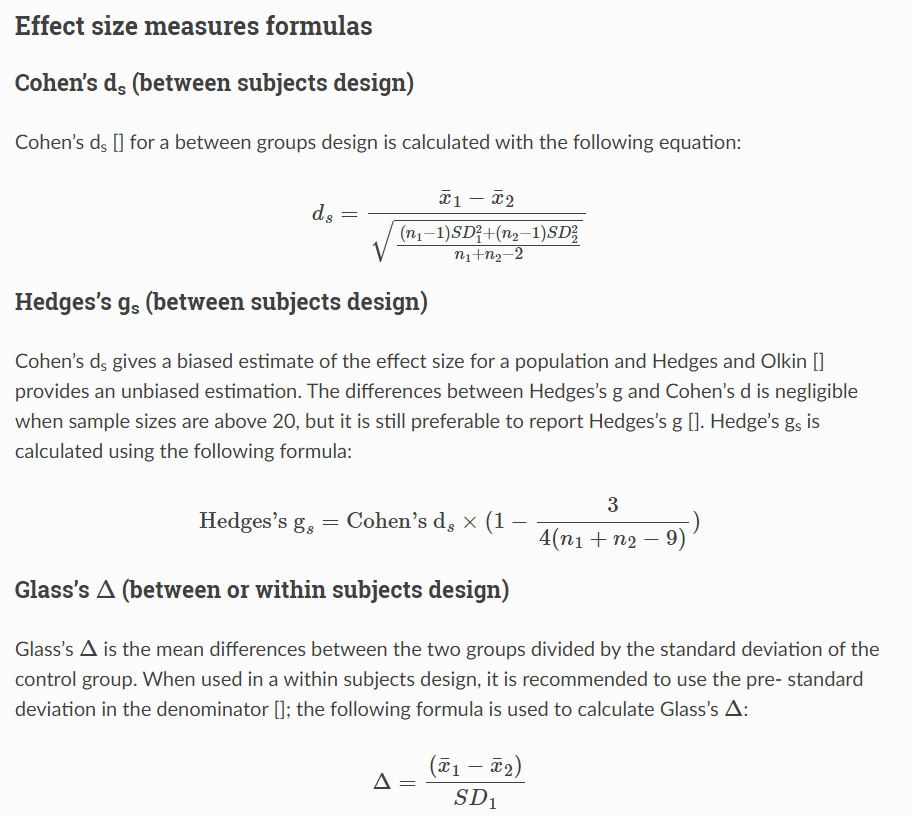

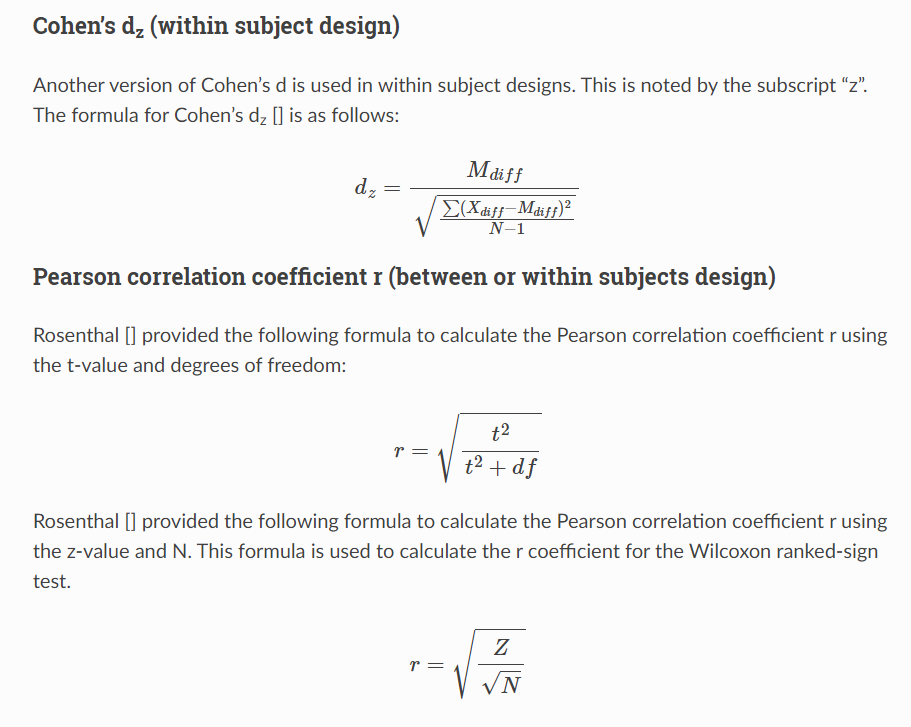

In [271]:
rp.ttest(male, female)

(   Variable     N        Mean        SD        SE   95% Conf.    Interval
 0    height   7.0  179.871429  6.216836  2.349743  174.121814  185.621043
 1    height   7.0  171.057143  5.697619  2.153497  165.787725  176.326561
 2  combined  14.0  175.464286  7.330611  1.959188  171.231717  179.696854,
                 Independent t-test  results
 0  Difference (height - height) =    8.8143
 1            Degrees of freedom =   12.0000
 2                             t =    2.7654
 3         Two side test p value =    0.0171
 4        Difference < 0 p value =    0.9914
 5        Difference > 0 p value =    0.0086
 6                     Cohen's d =    1.4782
 7                     Hedge's g =    1.3838
 8                 Glass's delta =    1.4178
 9                   Pearson's r =    0.6239)

In [272]:
descriptive,result=rp.ttest(male, female)

In [273]:
descriptive

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,height,7.0,179.871429,6.216836,2.349743,174.121814,185.621043
1,height,7.0,171.057143,5.697619,2.153497,165.787725,176.326561
2,combined,14.0,175.464286,7.330611,1.959188,171.231717,179.696854


In [274]:
result

,Independent t-test,results
0,Difference (height - height) =,8.8143
1,Degrees of freedom =,12.0000
2,t =,2.7654
3,Two side test p value =,0.0171
4,Difference < 0 p value =,0.9914
5,Difference > 0 p value =,0.0086
6,Cohen's d =,1.4782
7,Hedge's g =,1.3838
8,Glass's delta =,1.4178
9,Pearson's r =,0.6239


# Paired Sample T-test

# Hypothesis Testing Example (Blood Pressure Dataset)

In [275]:
df = pd.read_csv("blood_pressure.csv")

In [276]:
#check shape
df.shape

(120, 6)

In [277]:
df.head()#check the head

,Unnamed: 0,patient,sex,agegrp,bp_before,bp_after
0,0,1,Male,30-45,143,153
1,1,2,Male,30-45,163,170
2,2,3,Male,30-45,153,168
3,3,4,Male,30-45,153,142
4,4,5,Male,30-45,146,141


In [278]:
 #check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  120 non-null    int64 
 1   patient     120 non-null    int64 
 2   sex         120 non-null    object
 3   agegrp      120 non-null    object
 4   bp_before   120 non-null    int64 
 5   bp_after    120 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 5.8+ KB


In [279]:
#check null values
df.isnull().sum()

Unnamed: 0    0
patient       0
sex           0
agegrp        0
bp_before     0
bp_after      0
dtype: int64

### Bussiness Problem: Is there any significiant diference between blood presure before and after getting one specific treatment

### Since we measure blood pressure of each subject two times  the two groups are not indepent so we want to apply paired t-test 

# Descrptive Statistic

In [280]:
df.describe()

,Unnamed: 0,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000,120.000000
mean,59.500000,60.500000,156.450000,151.358333
std,34.785054,34.785054,11.389845,14.177622
min,0.000000,1.000000,138.000000,125.000000
25%,29.750000,30.750000,147.000000,140.750000
50%,59.500000,60.500000,154.500000,149.500000
75%,89.250000,90.250000,164.000000,161.000000
max,119.000000,120.000000,185.000000,185.000000


### Before applying Parid t-test you have to think about assumption

https://www.statology.org/paired-samples-t-test/

### 1. Checking outliers

<AxesSubplot:ylabel='bp_before'>

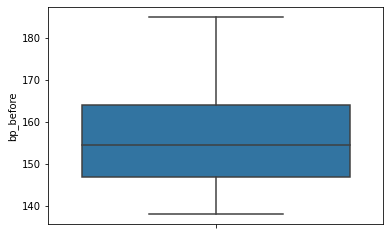

In [281]:
sns.boxplot( y=df['bp_before'] )

<AxesSubplot:ylabel='bp_after'>

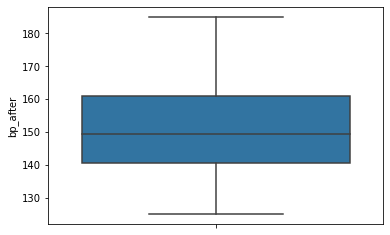

In [282]:
sns.boxplot( y=df['bp_after'] )

# 2. NORMALITY TESTS

In [283]:
import scipy.stats as stats

### Shapiro-Wilk (SW) Test

In [284]:
diff=df['bp_after']-df['bp_before']

In [285]:
stats.shapiro(diff )

ShapiroResult(statistic=0.9926842451095581, pvalue=0.7841846942901611)

## or

In [286]:
#Let's use shapiro-wilk test to check normality
#H0 : Residuals are normally distributed
#H1 : Residuals are not normally distributed
alpha = 0.05
stats,p_value = stats.shapiro(diff)
if p_value > alpha:
 print('Failed to reject null hypothesis \n P-value: {}'.format(p_value))
else:
 print('Reject null hypothesis \n P-value: {}'.format(p_value))

Failed to reject null hypothesis 
 P-value: 0.7841846942901611


https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

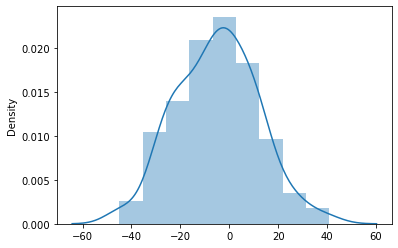

In [287]:
sns.distplot(diff)

# Pair sample t-test

### Method #1 : using stats (from scipy)

In [288]:
from scipy import stats

In [289]:
stats.ttest_rel(df['bp_before'],df['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

In [290]:
 #H0 : There's no difference in mean(No difference before and after an intervention)
#H1 : There's a difference in mean (There is difference before and after an intervention)
#Alpha : 0.5
alpha = 0.05
statistic , p_value = stats.ttest_rel(df['bp_before'],df['bp_after'])
if p_value > alpha:
  print(f'Fail to reject Null Hypothesis p-value is {p_value}')
else:
  print(f'Reject Null Hypothesis \nP_value : {p_value}')

Reject Null Hypothesis 
P_value : 0.0011297914644840823


### Method #2 : Python paired sample t-test with Pingouin

In [291]:
# Python paired sample t-test:
pg.ttest(df['bp_before'], df['bp_after'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.337187,119,two-sided,0.00113,"[2.07, 8.11]",0.395946,18.509,0.990414


### Method #3 : using researchpy

In [292]:
#install researchpy
!pip install researchpy
## it combines pandas, scipy.stats and statsmodels to
##get more complete information in a single API call


In [293]:
import researchpy as rp

https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [294]:
#we will use researchpy and see it's fusefullness here.
des,res=rp.ttest(df['bp_before'],df['bp_after'], paired =True)
des

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,bp_before,120.0,156.450000,11.389845,1.039746,154.391199,158.508801
1,bp_after,120.0,151.358333,14.177622,1.294234,148.795621,153.921046
2,diff,120.0,5.091667,16.713601,1.525736,2.070557,8.112776


In [295]:
res

,Paired samples t-test,results
0,Difference (bp_before - bp_after) =,5.0917
1,Degrees of freedom =,119.0000
2,t =,3.3372
3,Two side test p value =,0.0011
4,Difference < 0 p value =,0.9994
5,Difference > 0 p value =,0.0006
6,Cohen's d =,0.3983
7,Hedge's g =,0.3970
8,Glass's delta =,0.4470
9,Pearson's r =,0.2925


# Four Ways to Conduct One-Way ANOVA

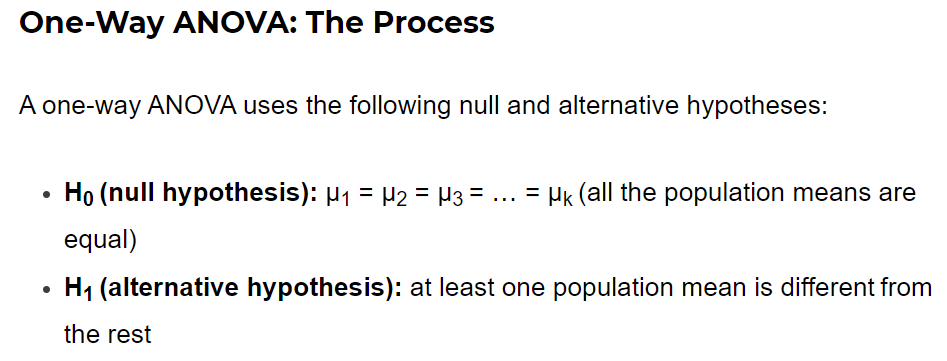

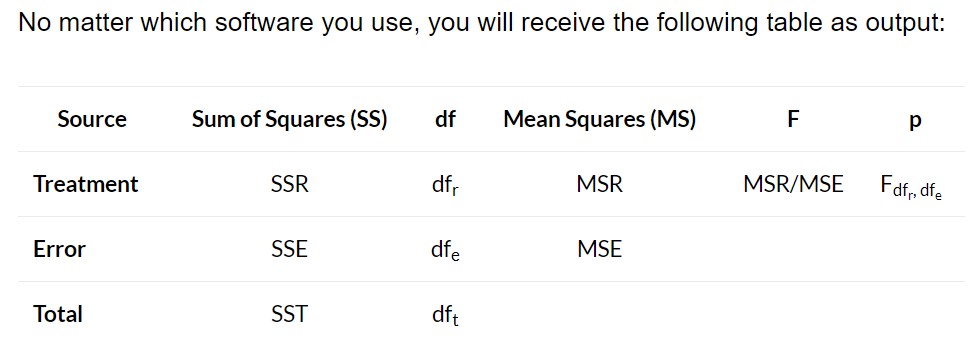

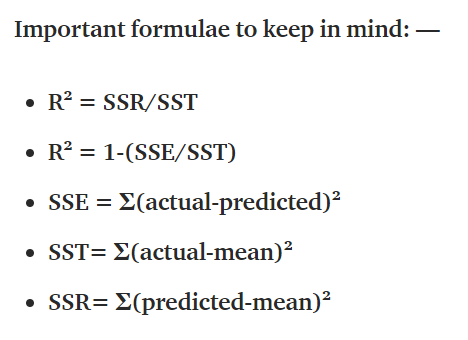

# Please read following Referenc carefully:

http://www.biostathandbook.com/onewayanova.html

In [296]:
#import pandas as pd
datafile = "PlantGrowth.csv"
data = pd.read_csv(datafile)

In [297]:
#check shape
data.shape

(30, 3)

In [298]:
#check the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   weight      30 non-null     float64
 2   group       30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [299]:
#check head
data.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [300]:
data

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [301]:
data.drop(labels='Unnamed: 0', axis=1, inplace=True)#inplace=True to update df

## Descriptive statistic

In [302]:
data.groupby('group').describe()

weight                                                    
       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31

# Cheking Assupmtions:

## Checking Outliers

<AxesSubplot:xlabel='group', ylabel='weight'>

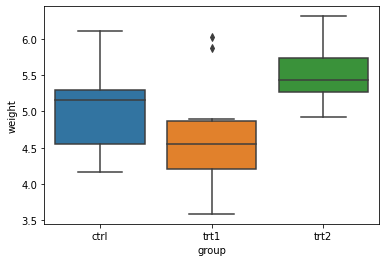

In [303]:
sns.boxplot(x='group', y='weight', data=data)

<AxesSubplot:title={'center':'weight'}, xlabel='group'>

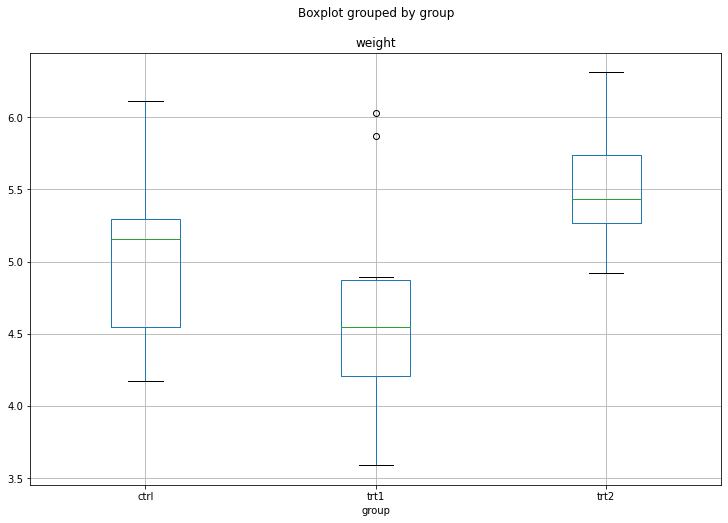

In [304]:
#or
#Create a boxplot
data.boxplot('weight', by='group', figsize=(12, 8))

## We don't have majaer outliers

In [305]:
df.head()

,Unnamed: 0,patient,sex,agegrp,bp_before,bp_after
0,0,1,Male,30-45,143,153
1,1,2,Male,30-45,163,170
2,2,3,Male,30-45,153,168
3,3,4,Male,30-45,153,142
4,4,5,Male,30-45,146,141


# Normality:

In [306]:
ctrl=data[data['group']=='ctrl']['weight']
trt1=data[data['group']=='trt1']['weight']
trt2=data[data['group']=='trt2']['weight']

In [307]:
stats.shapiro(ctrl )

ShapiroResult(statistic=0.9566815495491028, pvalue=0.7474744915962219)

In [308]:
stats.shapiro(trt1 )

ShapiroResult(statistic=0.9304108619689941, pvalue=0.451945960521698)

In [309]:
stats.shapiro(trt2)

ShapiroResult(statistic=0.9410051107406616, pvalue=0.5642509460449219)

ANOVA residuals don't have to be anywhere close to normal in order to fit the model. However, unless you have an enormous amount of data, near-normality of the residuals is essential for p-values computed from the F-distribution to be meaningful.

https://stats.stackexchange.com/questions/6350/anova-assumption-normality-normal-distribution-of-residuals

In [310]:
import statsmodels.formula.api as smf

model = smf.ols("weight ~ C(group) ", data= data).fit()

stats.shapiro(model.resid)

ShapiroResult(statistic=0.9660681486129761, pvalue=0.43789875507354736)

### Checking the Homogeneity of Variances Assumption

In [311]:
stats.levene(ctrl, trt1,trt2)

LeveneResult(statistic=1.1191856948703909, pvalue=0.3412266241254737)

### All assumption of Anova are met

## 1)ANOVA in Python using SciPy

In [312]:
ctrl = data['weight'][data.group == 'ctrl']

grps = pd.unique(data.group.values)
grps

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [313]:
stats.f_oneway(ctrl, trt1,trt2)
#or

F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)

In [314]:
#from scipy import stats
d_data = {grp:data['weight'][data.group == grp] for grp in grps}

F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])


## 2)ANOVA in Python using Statsmodels

### First, we import statsmodels API and ols:

In [315]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Second, we use ols to set up our model using a formula

In [316]:
mod = ols('weight ~ group',
                data=data).fit()

### now use anova_lm to carry out the ANOVA in Python

In [317]:
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


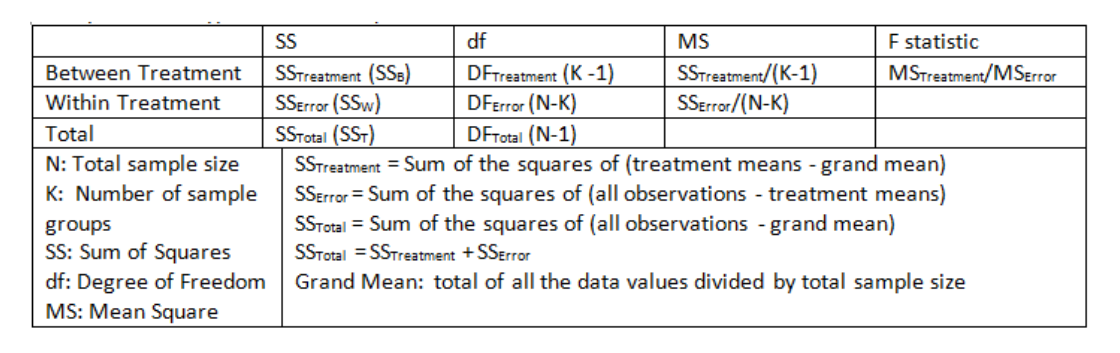

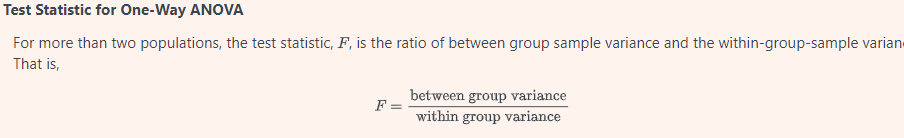

https://www.statdistributions.com/f/

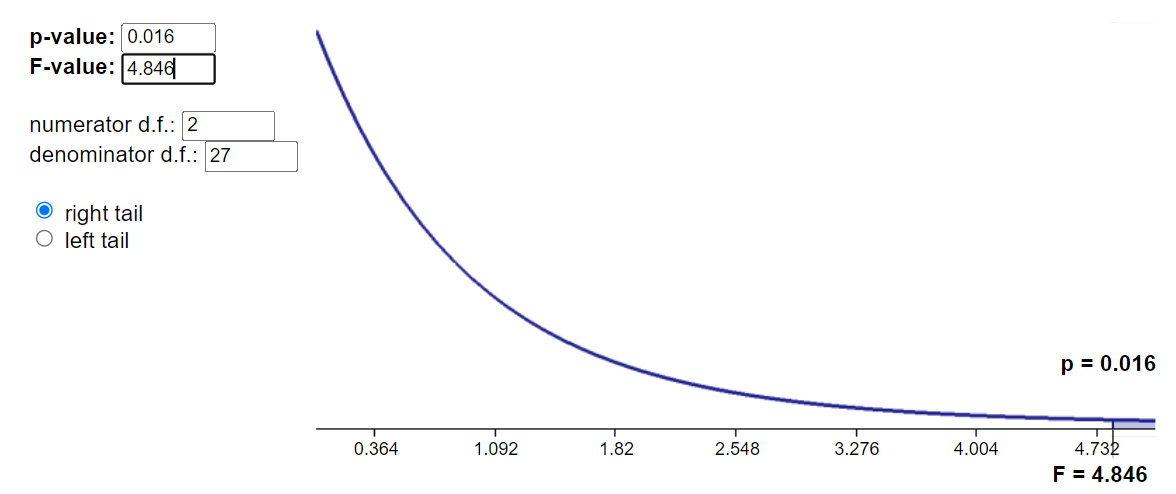

### Python ANOVA: Pairwise Comparisons

In [318]:
pair_t = mod.t_test_pairwise('group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
trt1-ctrl,-0.371,0.278782,-1.330791,0.194388,-0.943013,0.201013,0.194388,False
trt2-ctrl,0.494,0.278782,1.771996,0.087682,-0.078013,1.066013,0.167675,False
trt2-trt1,0.865,0.278782,3.102787,0.004459,0.292987,1.437013,0.013318,True


## 3)Python ANOVA using pyvttbl anova1way

### 4)Python ANOVA using Pingouin

In [319]:
aov = pg.anova(data=data, dv='weight', between='group', detailed=True)
print(aov)

   Source        SS  DF        MS         F    p-unc       np2
0   group   3.76634   2  1.883170  4.846088  0.01591  0.264148
1  Within  10.49209  27  0.388596       NaN      NaN       NaN


## Pairwise Comparisons  in Python (Tukey-HSD)

In [320]:
pt = pg.pairwise_tukey(dv='weight', between='group', data=data)
print(pt)

      A     B  mean(A)  mean(B)   diff        se         T   p-tukey    hedges
0  ctrl  trt1    5.032    4.661  0.371  0.278782  1.330791  0.392139  0.570001
1  ctrl  trt2    5.032    5.526 -0.494  0.278782 -1.771996  0.198036 -0.758977
2  trt1  trt2    4.661    5.526 -0.865  0.278782 -3.102787  0.011993 -1.328977


## Method#2

In [321]:
from statsmodels.stats.multicomp import MultiComparison
mul_comp = MultiComparison(data['weight'],data['group'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


# Bike Sharing Dataset

In [322]:
#read the data
df = pd.read_csv('bike_sharing.csv')


In [323]:
#check shape
df.shape

(10886, 12)

In [324]:
#check head
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [325]:
#check the information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [326]:
#check the number of null values in each column
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# correlation

In [327]:
# Find all correlations between Columns and Credit Score and sort 
cor = df.corr()
cor

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<AxesSubplot:>

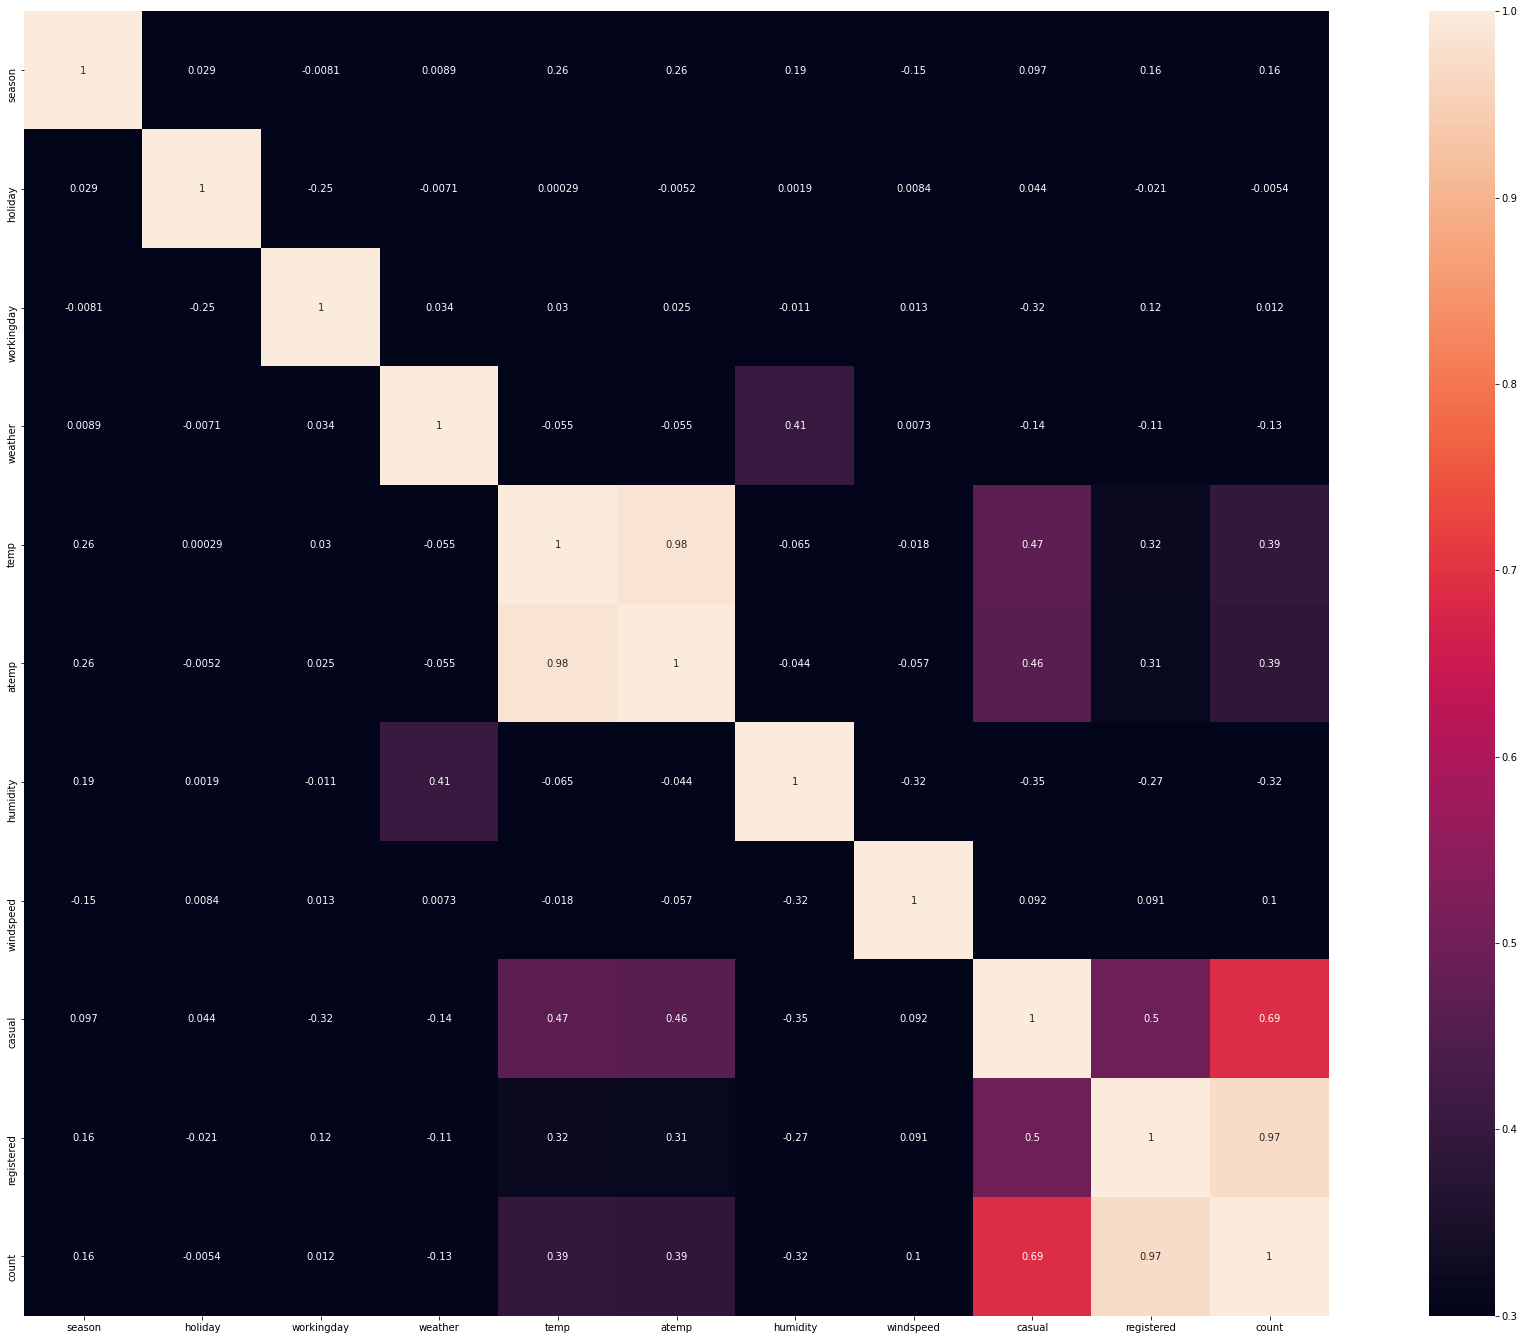

In [328]:
corr=df.corr()
f, ax = plt.subplots(figsize=(36,24))
sns.heatmap(corr,vmax=1, vmin=0.3, square=True, annot=True)#vmin, vmaxfloats, optional:Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.


In [329]:
df['atemp'].corr(df['temp']) #atemp and temp are correlated

0.984948110481707

In [330]:
#drop datetime
df.drop(['datetime','atemp'],axis = 1,inplace=True)

In [331]:
df_copy=df[:]

In [332]:
#check the unique values in each column
df.apply(lambda x : x.nunique())

season          4
holiday         2
workingday      2
weather         4
temp           49
humidity       89
windspeed      28
casual        309
registered    731
count         822
dtype: int64

In [333]:
#standardize all the numerical features
from sklearn.preprocessing import scale

num_scaled = scale (df[['temp','humidity','windspeed','casual','registered']],copy=False)
#scale takes the difference of each values from the mean and divide by standard deviation
num_scaled

array([[-1.33366069,  0.99321305, -1.56775367, -0.66099193, -0.94385353],
       [-1.43890721,  0.94124921, -1.56775367, -0.56090822, -0.81805246],
       [-1.43890721,  0.94124921, -1.56775367, -0.62095844, -0.851158  ],
       ...,
       [-0.80742813, -0.04606385,  0.26970368, -0.64097518,  0.05593396],
       [-0.80742813, -0.04606385, -0.83244247, -0.48084125, -0.25525818],
       [-0.91267464,  0.21375537, -0.46560752, -0.64097518, -0.47375478]])

### Business Problem:the number of bikes rented on working day are different then number of bikes rented on non-working days?

## Preparing Data for t-test


## Descriptive analysis

In [334]:
#Let's check the mean of bikes rented on working and non-working days.
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [335]:
#create 2 samples one for working days and one for non-working days
sample_01 = df[df['workingday'] == 1]
sample_02 = df[df['workingday'] == 0]

## Assumption of t-test

### 1.Outliers

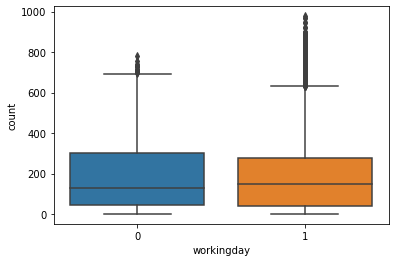

In [337]:
ax = sns.boxplot(x='workingday', y='count', data=df)

## 2. Normality

In [338]:
#create 2 samples one for working days and one for non-working days
sample_01 = df[df['workingday'] == 1]
sample_02 = df[df['workingday'] == 0]

In [339]:
sample_01.shape

(7412, 10)

In [340]:
sample_02.shape

(3474, 10)

In [341]:
stats.shapiro(sample_02)

C:\Users\lenovo\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.5632535219192505, pvalue=0.0)

## D'Agostino-Pearson K2 Test

In [342]:
stats.normaltest(sample_01['count'])

NormaltestResult(statistic=1635.1041949298792, pvalue=0.0)

In [343]:
stats.normaltest(sample_02['count'])

NormaltestResult(statistic=390.99412828863495, pvalue=1.2494066519470979e-85)

#### Since p-value is less than 5% we reject null hypothese and conclude that theys are not normally distributed:

## HOMOGENEITY OF VARIANCES

In [ ]:
#Levene's test to check whether the variances of the two group are same.
#H0 : Variances are same.
#H1 : Variances are not same.
#Alpha = 0.05%
#if p-value > alpha (Cannot reject H0)
#if p-value < alpha (Accept null hypothesis)

In [ ]:
alpha = 0.05
Stats,Pvalue = stats.levene(sample_01['count'],sample_02['count'])
print(f' Test statistics : {Stats} \n Alpha : {alpha} \n P-value : {Pvalue}')
if Pvalue > alpha:
    print(' Variances are same accept null hypothesis ')
else:
    print(' Variances are not same reject not null hypothesis ')

In [ ]:
# H0 : There's no difference in mean (Bike rental doesn't depends on workingday)
# H1 : There's a difference in mean (Bike rental depends on workingday)
# Alpha : 0.05%
alpha = 0.05
statistic , p_value = stats.ttest_ind(sample_01['count'],sample_02['count'])
if p_value > alpha:
    print(f'Fail to reject Null Hypothesis p-value is {p_value}')
else:
    print('Reject Null Hypothesis')

# One-Way Annova Example with Bike Sharing Dataset

In [ ]:
df=df_copy[:]

In [ ]:
df['weather'].value_counts()

In [ ]:
df.drop(df[df['weather']==4].index,axis=0,inplace=True) #remove the records where weather == 4

## Descriptive Statistic

In [ ]:
df.groupby('weather')['count'].describe() #groupby weather situation and check the description

## Cheking the assumption:

### no major outliers

In [ ]:
ax = sns.boxplot(x='weather', y='count', data=df)

In [ ]:
g1=df['count'][df['weather']==1]
g2=df['count'][df['weather']==2]
g3=df['count'][df['weather']==3]

## 2. Normality

In [ ]:
stats.shapiro(g1)

In [ ]:
stats.shapiro(g2)

In [ ]:
stats.shapiro(g3)

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols("weather ~ C(count) ", data= df).fit()

stats.shapiro(model.resid)

## 3.Checking the Homogeneity of Variances Assumption


In [ ]:
stats.levene(g1, g2,g3)

In [ ]:
df.groupby('weather')['count'].describe()

## Applying Anova based on:

## Method1)ANOVA in Python using SciPy

In [ ]:
#perfrom one way annova using stats module from scipy library
#H0 : There is no difference in the mean
#H1 : There is a difference in the mean
#Alpha : 0.05
alpha = 0.05
Stats,p_value = stats.f_oneway(g1,g2,g3)

if p_value > alpha :
    print(f' Failed to reject null hypothesis \n Weather situation have no impact on bike rentals \n {p_value}')
else:
    print(f' Reject null hypothesis \n Weather situation has impact on bike rentals \n p-value : {p_value}')


## Method2)ANOVA in Python using Statsmodels

In [ ]:
mod = ols('count ~ weather',
                data=df).fit()

In [ ]:
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

In [ ]:
df.head()

# Tukey HSD Post-Hoc-Test

## Method#1

In [ ]:
pt = pg.pairwise_tukey(dv='count', between='weather', data=df)
print(pt)

## Method#2

In [ ]:
#Use TukeyHSD to know which group mean are not similar.
#from statsmodels.stats.multicomp import MultiComparison
mul_comp = MultiComparison(df['count'],df['weather'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

## Applying Welch's anova 

In [ ]:
pg.welch_anova(dv='count', between='weather', data=df)

In [ ]:
pg.pairwise_gameshowell(dv='count', between='weather', data=df)

# Applying Kruskal-Wallis Test

In [ ]:
stats.kruskal(g1,g2,g3)

# Repeated Measures ANOVA Test

In [ ]:
#we create an artifitial data frame
import numpy as np
df = pd.DataFrame({'patient': np.repeat([1, 2, 3, 4, 5], 4),
                   'drug': np.tile([1, 2, 3, 4], 5),
                   'response': [30, 28, 16, 34,
                                14, 18, 10, 22,
                                24, 20, 18, 30,
                                38, 34, 20, 44, 
                                26, 28, 14, 30]})


In [ ]:
df

In [ ]:
from statsmodels.stats.anova import AnovaRM

In [ ]:
#perform the repeated measures ANOVA
print(AnovaRM(data=df, depvar='response', subject='patient', within=['drug']).fit()) 

## Note:This implementation currently only supports fully balanced designs

https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.AnovaRM.html

# Multi-variate analysis

# Two Way Anova 

In [ ]:
#check the description of groups of different weather situations
df.groupby('weather')['count'].describe()

In [ ]:
#check the description of groups of different seasons
df.groupby('season')['count'].describe()

In [ ]:

from statsmodels.formula.api import ols


In [ ]:
#Perfrom regression analysis with weather situation
model = ols('count ~ C(weather) * C(season)',df).fit() #fit the regression model
print(model.summary()) #print summary

In [ ]:
!pip install statsmodels --upgrade 

In [ ]:
import statsmodels.api as sm

In [ ]:
#H0: There's no difference in mean of weather
# There is No difference in Mean of Season
# There is no difference in mean of Weather and Season combined
sm.stats.anova_lm(model) ##perform two way anova